<a href="https://colab.research.google.com/github/LauraCorredor7/Finanzas-Computacionales/blob/main/Taller_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRESENTADO POR:
Santiago Bohorquez, Santiago Zuñiga y Laura Corredor

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd                    ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
 #plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
!pip install --quiet fitter
from fitter import Fitter, get_common_distributions, get_distributions
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore")


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df=pd.read_excel("DatosTF.xlsx").dropna()
df

,DATE,Inflacion,TRM,PIB,Tasa,alfa_pi
0,1994-03-01,0.2341,0.072451,0.060162,0.187143,0.071565
1,1994-06-01,0.2308,0.059548,0.060162,0.187143,0.060724
2,1994-09-01,0.2231,0.025196,0.060162,0.187143,0.050845
3,1994-12-01,0.2259,0.032120,0.060162,0.187143,0.042153
4,1995-03-01,0.2133,0.056199,0.060162,0.187143,0.034470
...,...,...,...,...,...,...
110,2021-09-01,0.0451,0.018779,0.136793,0.017500,-0.216508
111,2021-12-01,0.0562,0.143944,0.105789,0.023846,-0.217916
112,2022-03-01,0.0853,0.052121,0.085152,0.036813,-0.219318
113,2022-06-01,0.0967,0.062145,0.000000,0.056593,-0.220713


In [ ]:
df1=pd.read_excel("Data.xlsx").dropna()
df1

,Unnamed: 0,INF_objm,INF_obsm,PIB_potm,PIB_obsm
0,Q1m,0.03,0.126912,0.032,0.086200
1,Q2m,0.03,0.125331,0.032,0.087240
2,Q3m,0.03,0.127827,0.032,0.088261
3,Q4m,0.03,0.124816,0.032,0.089240


Text(0.5, 1.0, 'Inflacion')

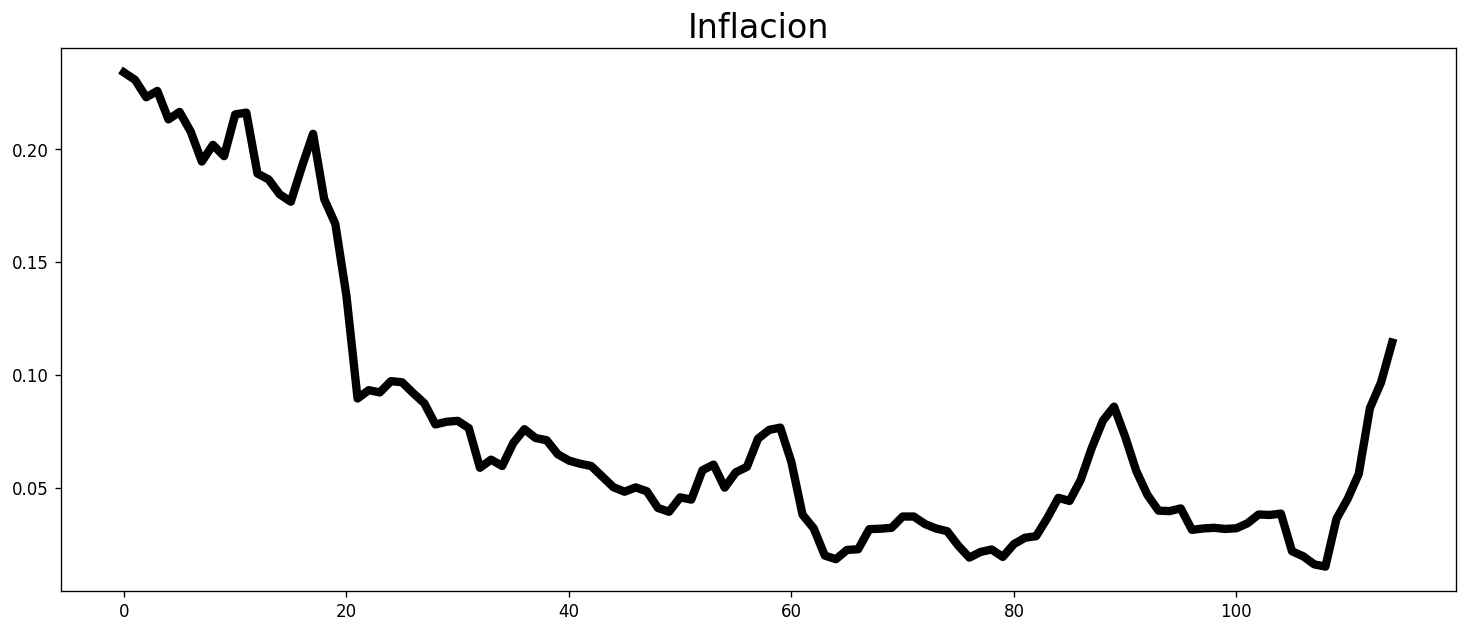

In [ ]:

plt.figure(figsize=(15,6))
plt.plot(df["Inflacion"],lw=5,color="k",)
plt.title("Inflacion",fontsize=20)

Text(0.5, 1.0, 'TRM')

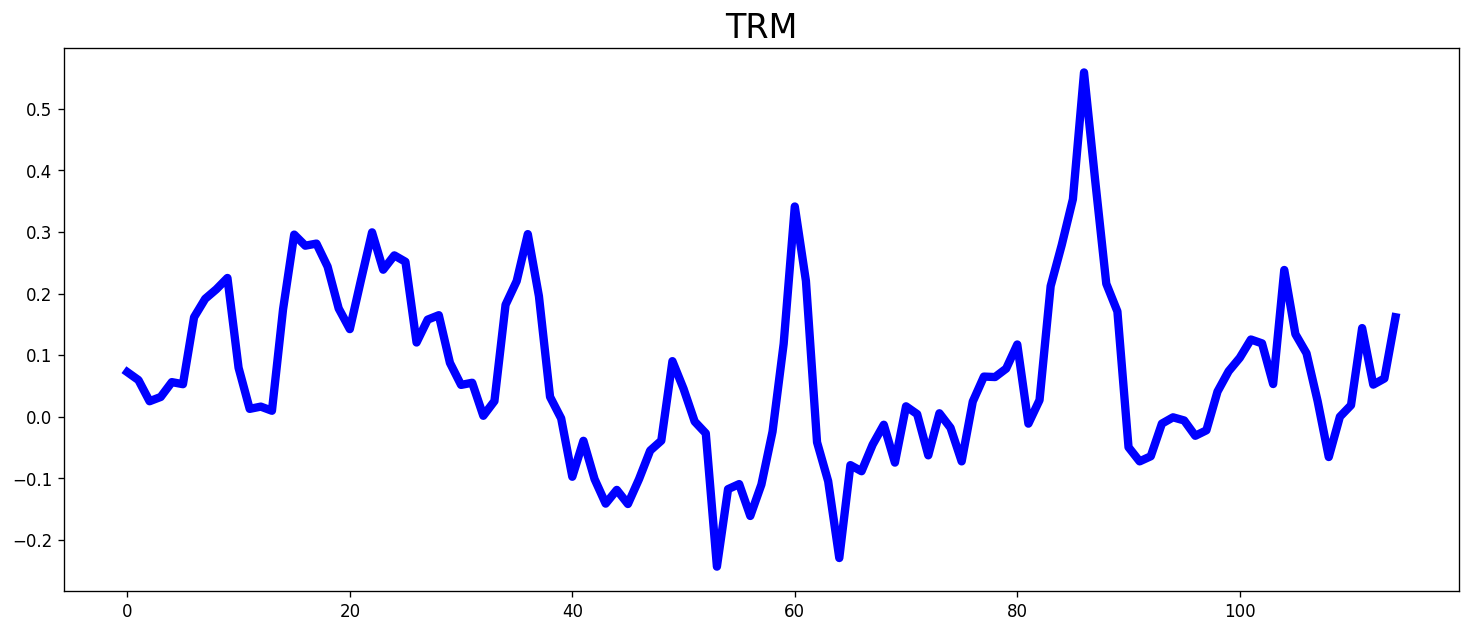

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df["TRM"],lw=5,color="b",)
plt.title("TRM",fontsize=20)

In [ ]:
result=adfuller(df["Inflacion"].diff().diff().dropna())
print("ADF Statistic:%f"% result[0])
print("p-value:%f"%result[1])

ADF Statistic:-5.567744
p-value:0.000001


Text(0.5, 1.0, 'PIB')

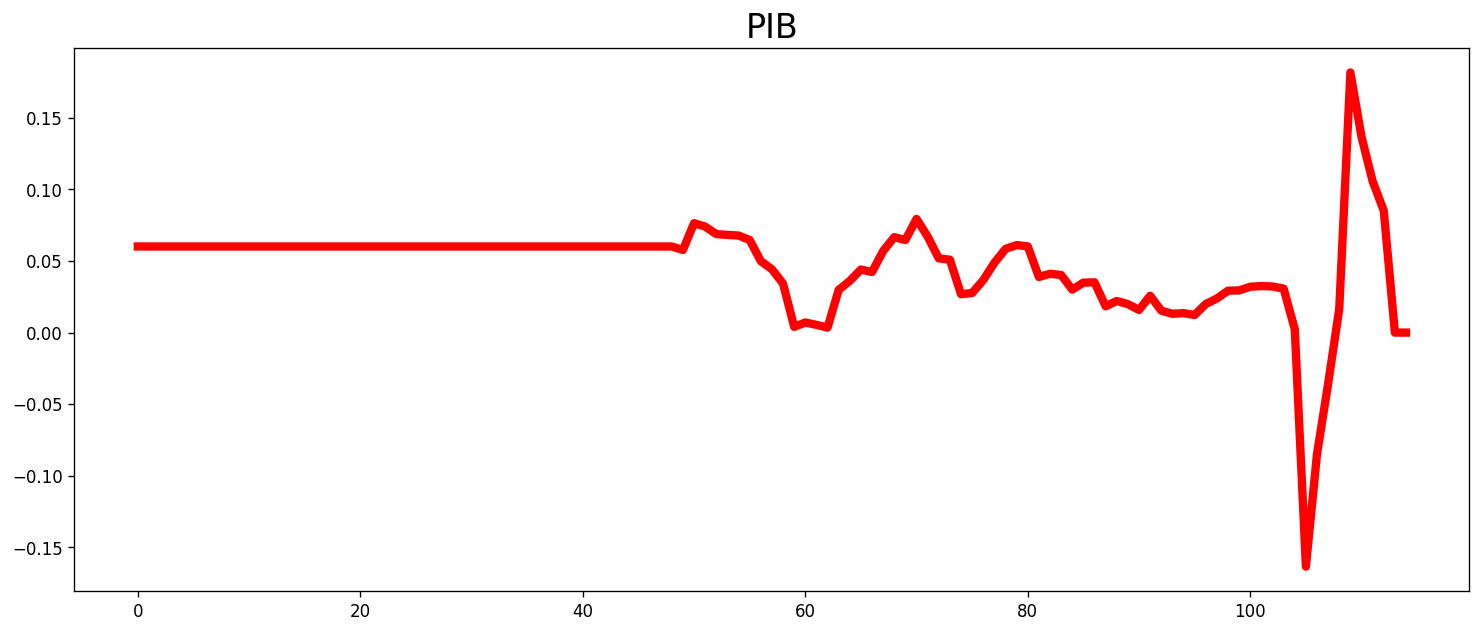

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df["PIB"],lw=5,color="r",)
plt.title("PIB",fontsize=20)

Text(0.5, 1.0, 'Tasa')

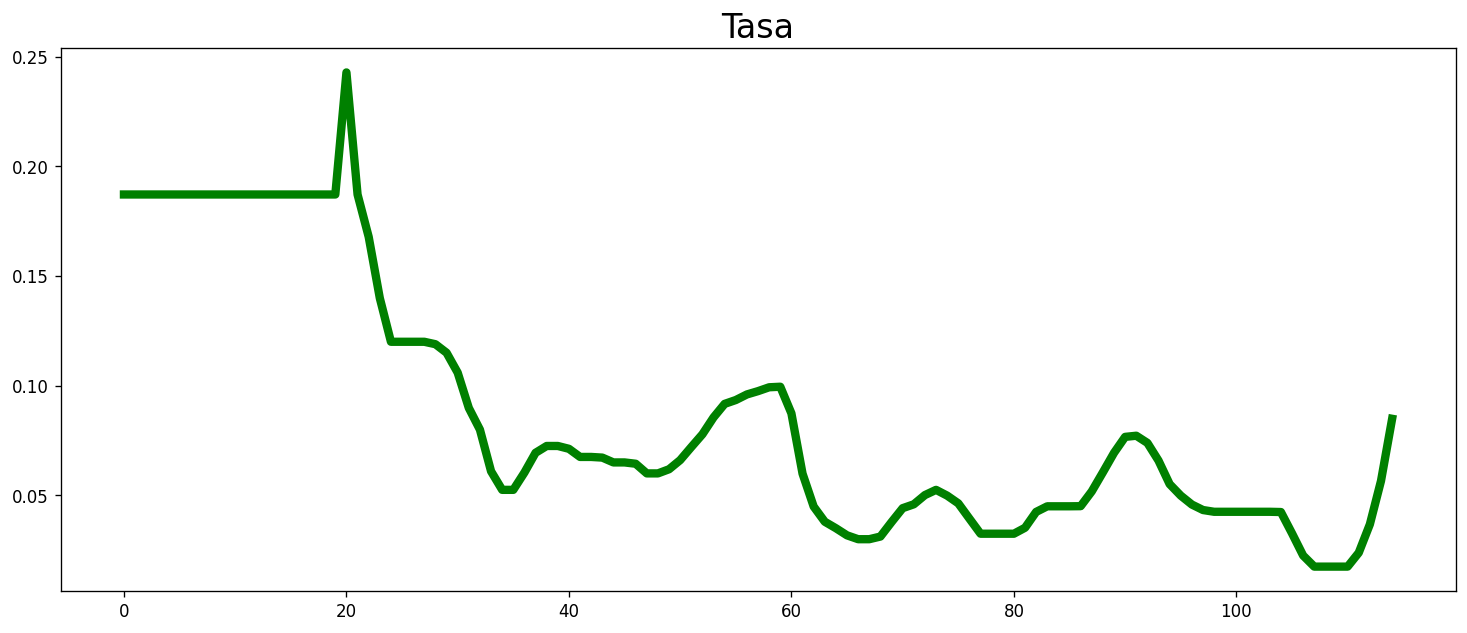

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df["Tasa"],lw=5,color="g",)
plt.title("Tasa",fontsize=20)

In [ ]:

#realizamos la prueba dicky fuller 
result=adfuller(df["Inflacion"].dropna())
print("ADF Statistic:%f"% result[0])
print("p-value:%f"%result[1])

ADF Statistic:-2.208701
p-value:0.203103


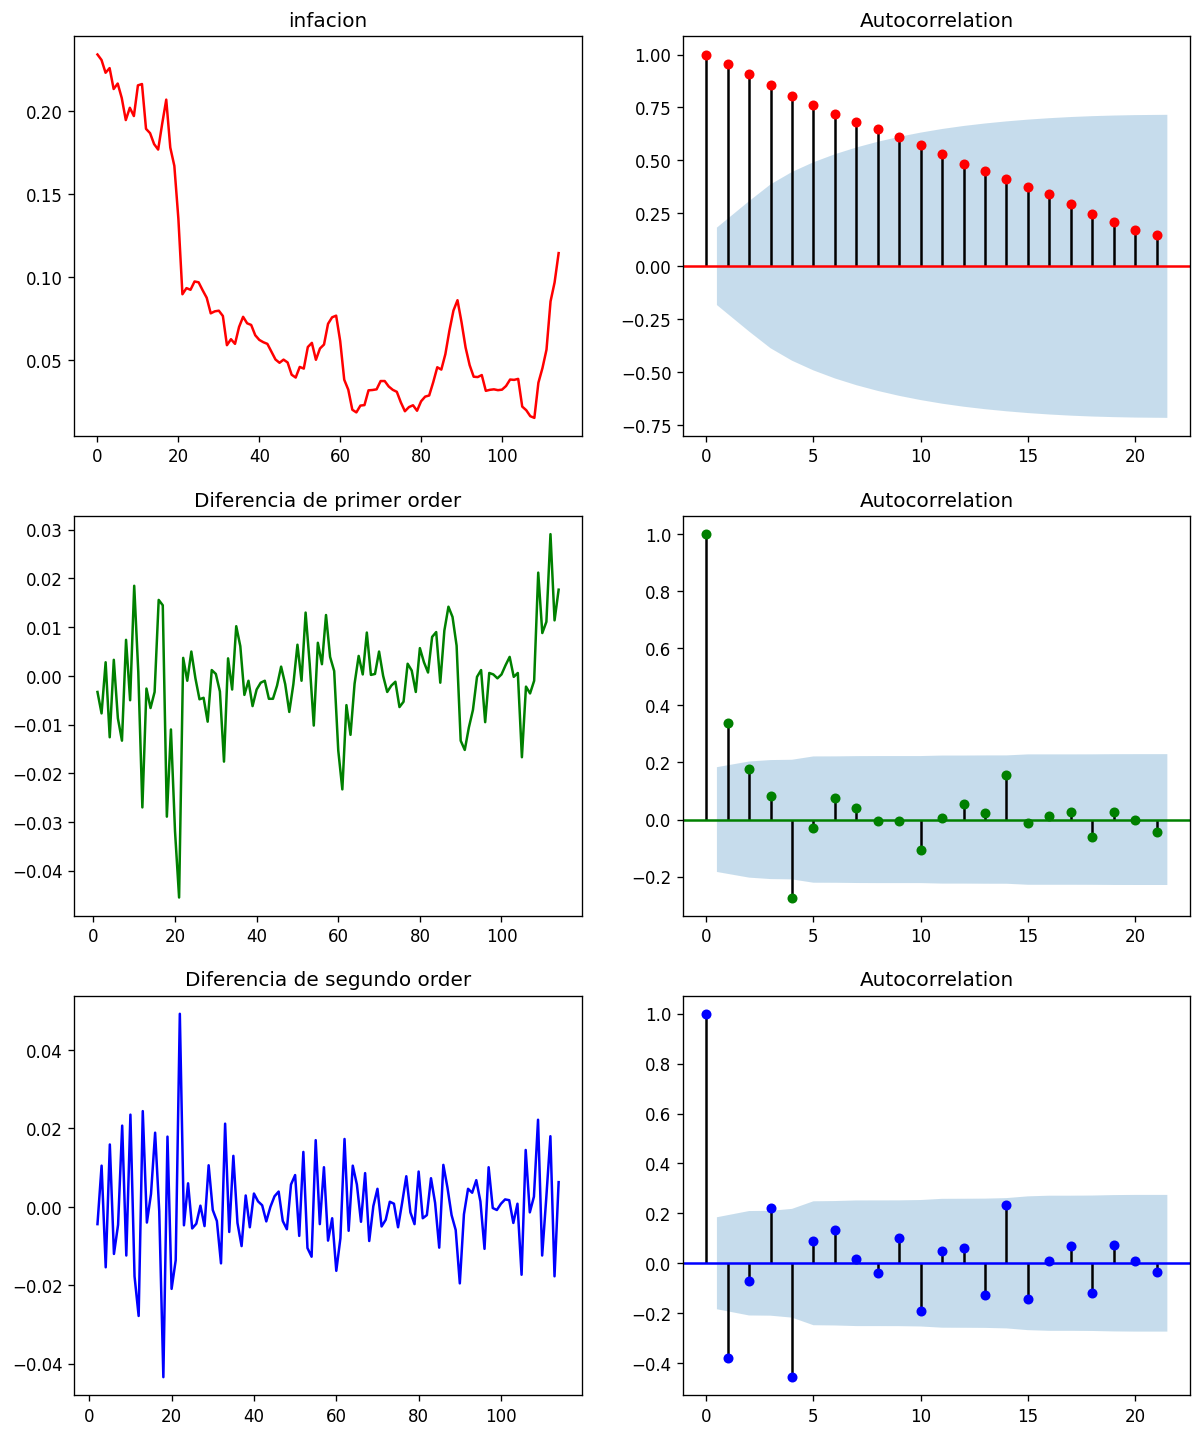

In [ ]:
plt.rcParams.update({"figure.figsize":(12,15),"figure.dpi":120})
fig,axes=plt.subplots(3,2,sharex=False)
axes[0,0].plot(df["Inflacion"],color="r");axes[0,0].set_title("infacion")
plot_acf(df["Inflacion"], ax =axes[0,1],color="r")
#primeras diferencias 
axes[1,0].plot(df["Inflacion"].diff(),color="g");axes[1,0].set_title("Diferencia de primer order")
plot_acf(df["Inflacion"].diff().dropna(),ax=axes[1,1],color="g")
#segunda diferencia
axes[2,0].plot(df["Inflacion"].diff().diff(),color="b");axes[2,0].set_title("Diferencia de segundo order")
plot_acf(df["Inflacion"].diff().diff().dropna(),ax=axes[2,1],color="b")
plt.show()


In [ ]:
result=adfuller(df["Inflacion"].diff().dropna())
print("ADF Statistic:%f"% result[0])
print("p-value:%f"%result[1])


ADF Statistic:-2.199404
p-value:0.206462


In [ ]:
result=adfuller(df["TRM"].diff().dropna())
print("ADF Statistic:%f"% result[0])
print("p-value:%f"%result[1])


ADF Statistic:-3.764385
p-value:0.003293


In [ ]:
x1=df["Inflacion"]-0.03
x2=df["PIB"]-0.032

In [ ]:
modelo = smf.ols(formula = 'Tasa ~x1 	+x2',
                 data = df)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   Tasa   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     305.0
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           4.76e-46
Time:                        17:12:10   Log-Likelihood:                 273.07
No. Observations:                 115   AIC:                            -540.1
Df Residuals:                     112   BIC:                            -531.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0448      0.003     16.321      0.0

In [ ]:
b0=0.0448
b1= 0.8475
b2= 0.8475

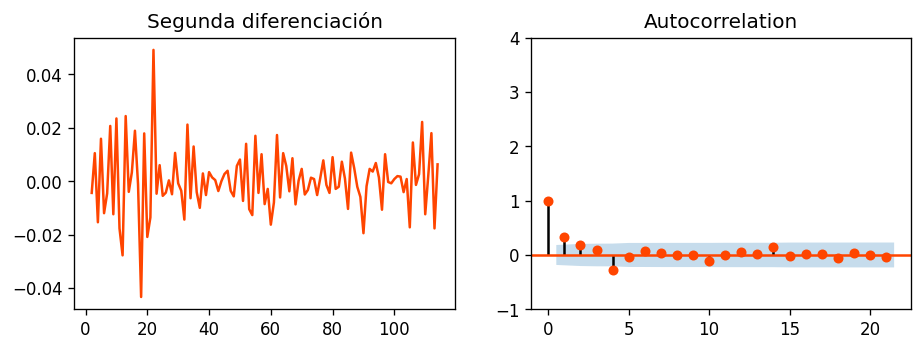

In [ ]:
#correlacion parcial AR
# PACF plot of ist differenced series
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df["Inflacion"].diff ().diff(), color="orangered" ) ; axes [0].set_title ("Segunda diferenciación")
axes [1].set (ylim=(-1,4))
plot_acf(df["Inflacion"].diff().dropna(),ax=axes[1],color="orangered")
plt.show()


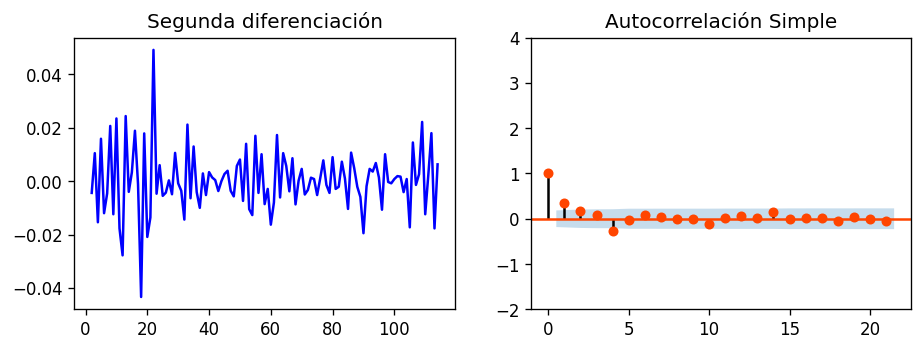

In [ ]:

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df["Inflacion"].diff().diff(),color="b");axes[0].set_title('Segunda diferenciación')
axes[1].set(ylim=(-2,4))
plot_acf(df["Inflacion"].diff().dropna(),ax=axes[1],color="orangered")
plt.title("Autocorrelación Simple")
plt.show()

In [ ]:
model_auto=pm.auto_arima(df["Inflacion"], xreg=df["TRM"],start_p=1,start_q=1,
                         test="adf",
                         max_p=3, max_q=3,
                         m=1,
                         d=None,
                         seasonal=False,
                         start_P=0,
                         D=0,
                         disp=0,
                         trace=True,
                         error_action="ignore",
                         suppres_warnings=True,
                         stepwise=True)
print(model_auto.summary().tables[1])





Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-724.959, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-714.433, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-726.541, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-724.507, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-715.268, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-725.187, Time=1.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-722.869, Time=1.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-728.053, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-726.792, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-726.533, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-725.838, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-724.183, Time=0.26 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.917 seconds
                 coef    std err          z      P>|z|      [0.025      0.975]
---------

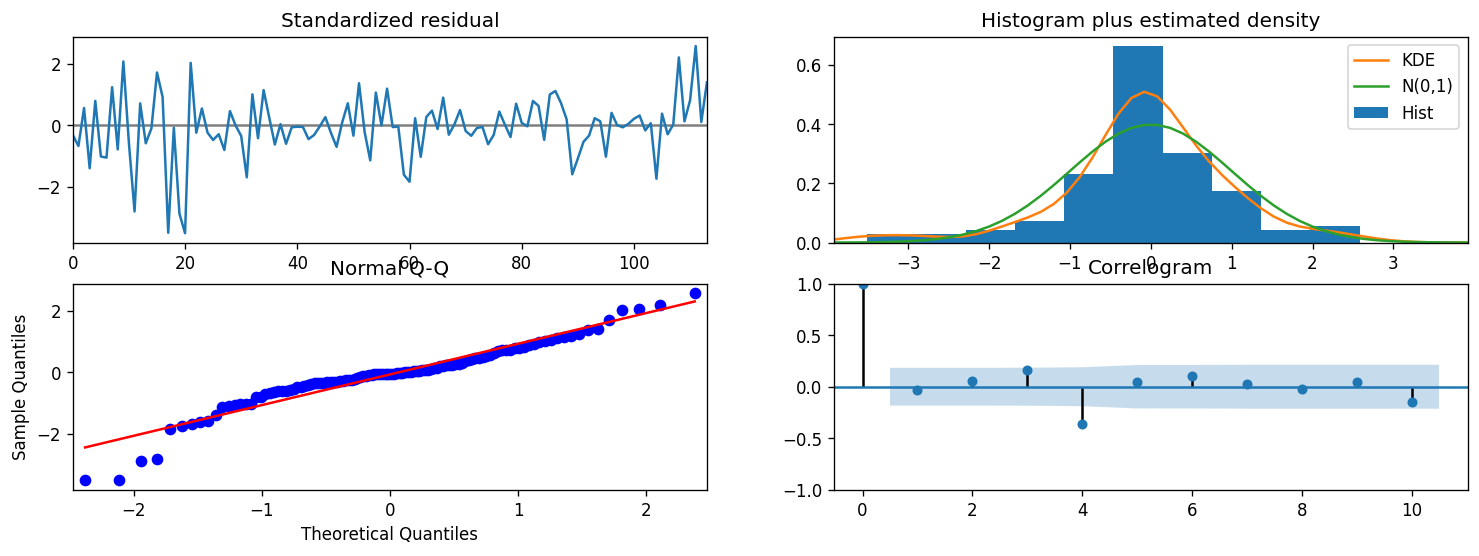

In [ ]:
model_auto.plot_diagnostics(figsize=(15,5))
plt.show()

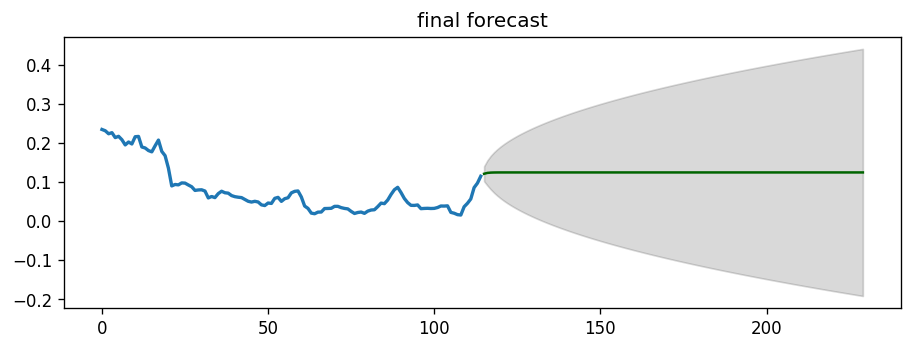

In [ ]:
#PLOT

plt.plot(df.Inflacion,lw=2)
plt.plot(fc_series,color="darkgreen")
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color="k",alpha=.15)
plt.title("final forecast")
plt.show()


In [ ]:
#forecast
n_periods =115
fc,confint=model_auto.predict(n_periods=n_periods,return_conf_int=True)
index_of_fc=np.arange(len(df),len(df)+n_periods)

fc_series=pd.Series(fc,index=index_of_fc)
lower_series=pd.Series(confint[:,0],index=index_of_fc)
upper_series=pd.Series(confint[:,1],index=index_of_fc)

In [ ]:
fc_series

115    0.120677
116    0.122902
117    0.123691
118    0.123971
119    0.124071
         ...   
225    0.124125
226    0.124125
227    0.124125
228    0.124125
229    0.124125
Length: 115, dtype: float64

In [ ]:
Rm1=b0+b1*( 0.120677-0.03)+b2*(0.0862-0.032)
Rm2=b0+b1*( 0.122902-0.03)+b2*(0.0872-0.032)
Rm3=b0+b1*( 0.123691-0.03)+b2*(0.0886-0.032)
Rm4=b0+b1*( 0.122902-0.03)+b2*(0.0892-0.032)


0.16758325750000003

In [ ]:
Tabla=pd.DataFrame([Rm1,Rm2,Rm3,Rm4],columns=["Tasa"])
Tabla


,Tasa
0,0.167583
1,0.170316
2,0.172172
3,0.172011


In [ ]:
lower_series

115    0.101565
116    0.090724
117    0.080845
118    0.072153
119    0.064470
         ...   
225   -0.186508
226   -0.187916
227   -0.189318
228   -0.190713
229   -0.192103
Length: 115, dtype: float64

In [ ]:
Rl1=b0+b1*( 0.101565-0.03)+b2*(0.08100-0.032)
Rl2=b0+b1*(0.090724-0.03)+b2*(0.0802-0.032)
Rl3=b0+b1*( 0.080845-0.03)+b2*(0.0805-0.032)
Rl4=b0+b1*( 0.072153-0.03)+b2*(0.0794-0.032)


In [ ]:
Tabla=pd.DataFrame([Rl1,Rl2,Rl3,Rl4],columns=["Tasa"])
Tabla

,Tasa
0,0.146979
1,0.137113
2,0.128995
3,0.120696


In [ ]:
upper_series

115    0.139788
116    0.155080
117    0.166538
118    0.175790
119    0.183671
         ...   
225    0.434758
226    0.436166
227    0.437568
228    0.438963
229    0.440353
Length: 115, dtype: float64

In [ ]:
Rh1=b0+b1*( 0.139788-0.03)+b2*(0.0923-0.032)
Rh2=b0+b1*(0.155080-0.03)+b2*(0.0948-.032)
Rh3=b0+b1*( 0.155080-0.03)+b2*(0.0988-0.032)
Rh4=b0+b1*( 0.166538-0.03)+b2*(0.101-0.032)

In [ ]:
Tabla=pd.DataFrame([Rh1,Rh2,Rh3,Rh4],columns=["Tasa"])
Tabla

,Tasa
0,0.188950
1,0.204028
2,0.207418
3,0.218993


SIMULACIÓN MONTECARLO

In [ ]:
PIB=(df.PIB)
mu=PIB.mean() #Tomarlo no como retornos sino como dispersión
sigma=PIB.std()

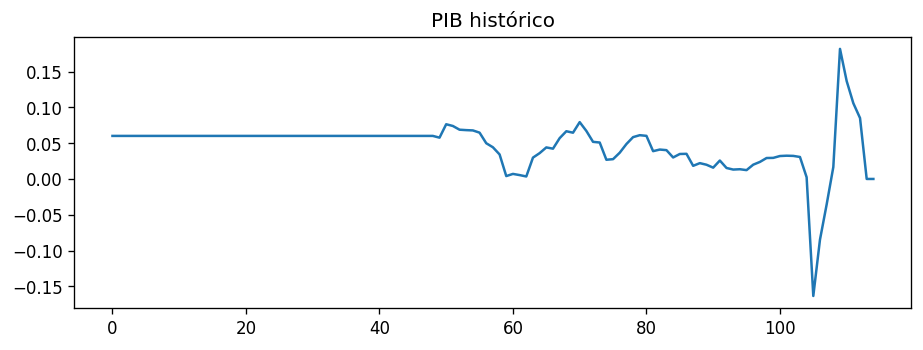

In [ ]:
plt.plot(PIB)
plt.title("PIB histórico")
plt.show()

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [ ]:
T = 1 #Tiempo
mu = mu #Tasa de crecimiento
sigma = sigma #Volatilidad del 20%
S0 = 0.08512 #Punto de partida, queremos ver como se comporta
NS = 1000 #trayectorias
M = 4 #Partición trimestral
St = PathsGBM(S0,mu,sigma,T,NS,M)

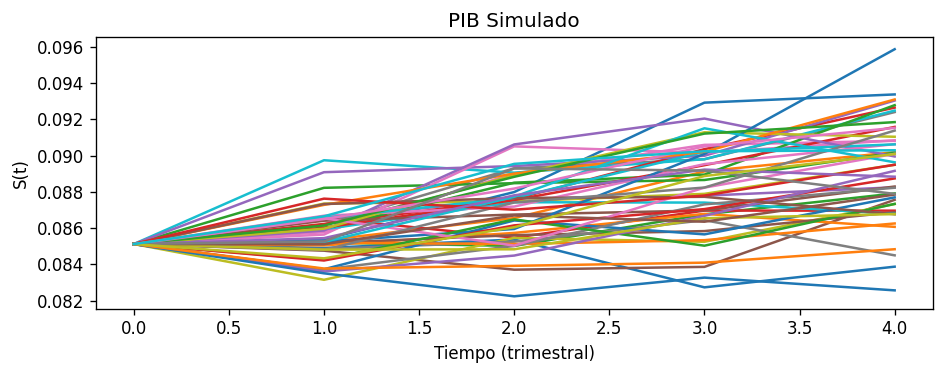

In [ ]:
plt.plot(np.transpose(St[0:50,:])) # Sólo se toman las primeras 50 trayectorias simuladas
plt.xlabel("Tiempo (trimestral)")
plt.title("PIB Simulado")
plt.ylabel("S(t)")
plt.show()

In [ ]:
#Calcular valor esperado, jugar con el tamaño del intervalo...
St[:,4].mean()  

0.061980339124074545

In [ ]:
#calculo valor esperado, promedio del valor anterior
St[:,3].mean()

0.061980339124074545

El valor promedio va a ser un PIB de 6,1%




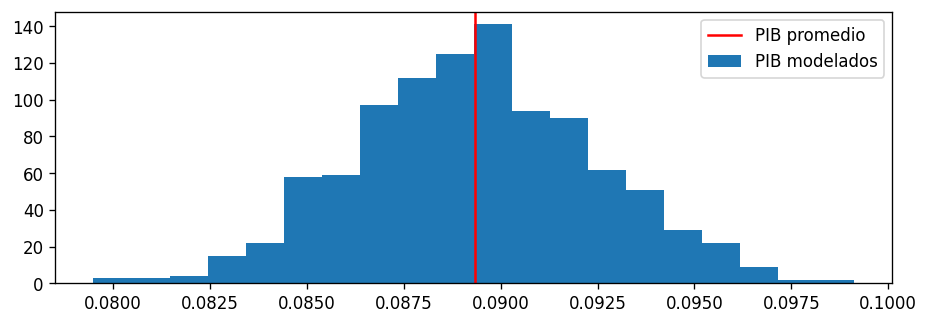

In [ ]:
# Precio modelado en T
plt.hist(St[:,4], bins=20, label='PIB modelados')
plt.axvline(St[:,4].mean(), color='r', label='PIB promedio')
plt.legend()